### Ponderada Spotify

Primeiramente para a realização da ponderada, é preciso importar todas as bibiliotecas que irão aixiliar neste projeto. Sendo elas ferramentas fundamentais na manipulação, análise e visualização de grandes volumes de dados de maneira eficiente. OFerecendo funções e estruturas otimizadas para realizar tarefas comuns de processamento e exploração de dados. 

In [405]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.preprocessing import OneHotEncoder

#### Limpeza e Tratamento de Valores Nulos

A limpeza e o tratamento de valores nulos são fundamentais para a criação do modelo preditivo. Isso é evidente quando possuimos valores nulos e outiliers, de modo que quando estivermos treinando nosso modelo, ele seja influenciado por valores exorbitantes e que foge do habitual. Por exemplo se usarmos o kmeans do qual agrupa objetos semelhantes e ao definir os centroides pode haver um determinado outilier que sozinho gere um centroide por se destiguir dos demais, impactando assim negativamente o modelo do qual estamos criando. 

Já quando se trata de valores nulos, a maioria dos modelos não conseguem lidar com estes, podendo resultar em erros de execução ou em problemas de convergência durante o treinamento do modelo. 

Sendo assim, iremos fazer agora a limpeza dos nossos dados, além de também importa-los para que os dados estejam disponíveis para o treinamento do modelo preditivo. 

In [406]:
df_train = pd.read_csv('test.csv')


A fim de identifcar o formato dos dados e visualizar a tabela, eu utilizei a função head, esta que me mostra as cinco primeiras linhas da tabela. Nesta não consegui observar nenhum erro, principalmente por representar uma amostra muito pequena dos dados.

In [407]:

df_train.columns


Index(['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

Já para ver tanto os tipos das váriaveis da minha tabela, tanto o número de valores nulos, utilizei a função "Info", olhando os dados anteriormente e comparando com os tipos, vi que todos estavam corretos e que batiam com que estavam sendo exibidos na função info. Mas um ponto que me deixou em alerta foi a presença de um valor nulo nas colunas artists, album_name e track_name, evidencias essas que foram percebidas pelo número de linhas que é 34200 que não bate com com os 34199 dessas três colunas.

In [408]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34200 entries, 0 to 34199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_unique_id   34200 non-null  int64  
 1   track_id          34200 non-null  object 
 2   artists           34199 non-null  object 
 3   album_name        34199 non-null  object 
 4   track_name        34199 non-null  object 
 5   duration_ms       34200 non-null  int64  
 6   explicit          34200 non-null  bool   
 7   danceability      34200 non-null  float64
 8   energy            34200 non-null  float64
 9   key               34200 non-null  int64  
 10  loudness          34200 non-null  float64
 11  mode              34200 non-null  int64  
 12  speechiness       34200 non-null  float64
 13  acousticness      34200 non-null  float64
 14  instrumentalness  34200 non-null  float64
 15  liveness          34200 non-null  float64
 16  valence           34200 non-null  float6

Sendo assim, já pedi para printar a linha desses valores e descobri que se tratava de uma linha, da qual não exclui pois se trata de uma linha com informações que não vão impactar meu modelo, pois se trata de nomes o que não irei utilizar para testar meu modelo.

In [409]:
linhas_com_nulos = df_train[df_train.isnull().any(axis=1)]
print(linhas_com_nulos)

      track_unique_id                track_id artists album_name track_name  \
7668            65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

      duration_ms  explicit  danceability  energy  key  loudness  mode  \
7668            0     False         0.501   0.583    7     -9.46     0   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
7668       0.0605          0.69           0.00396    0.0747    0.734  138.391   

      time_signature track_genre  
7668               4       k-pop  


Agora vou utilizar a fução describe para ver se possuem alguns valores que não correspondem com os valores determinados no enunciado do projeto, pois estes podem prejudicar meu modelo com informações que não correspondem com a realidade. 

In [410]:
df_train.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,34200.000000,3.420000e+04,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000
mean,56670.513889,2.283254e+05,0.565591,0.641041,5.314035,-8.247806,0.637135,0.084423,0.314750,0.153087,0.214113,0.473605,122.314152,3.907485
std,32710.184506,1.123471e+05,0.174544,0.251737,3.554899,5.014973,0.480834,0.105910,0.332552,0.306634,0.191084,0.259849,30.062414,0.428702
min,3.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28612.500000,1.733250e+05,0.455000,0.472000,2.000000,-10.039000,0.000000,0.035800,0.016600,0.000000,0.098200,0.256000,99.537500,4.000000
50%,56475.500000,2.131775e+05,0.579000,0.683000,5.000000,-6.984000,1.000000,0.048700,0.168500,0.000043,0.133000,0.463000,122.052500,4.000000
75%,84855.750000,2.616720e+05,0.693000,0.853000,8.000000,-5.011000,1.000000,0.084700,0.597000,0.045800,0.273000,0.682000,140.204000,4.000000
max,113999.000000,4.730302e+06,0.980000,1.000000,11.000000,1.795000,1.000000,0.963000,0.996000,1.000000,1.000000,0.992000,243.372000,5.000000


Analisando esses dados percebi que havia algo de errado com o min do decribe, pois não tem como uma música ter duração 0 e time_signature menor que 4, sendo assim quis investigar melhor esses dados, fazendo uma lógica que exibisse os dados que possuissem valores da coluna time_signature menor que 3 e depois que possui duretion_ms = 0. No caso da duração, percebi que se tratava da mesma linha que já havia visto anteriomente, como essa linha pode ser problematica no futuro, uma vez que vou escolher as features e duração pode ser um fator, resolvi apagar essa, ainda mais que se trata só de uma.

In [411]:
linhas_filtradas = df_train[ (df_train['duration_ms'] == 0)]
print(linhas_filtradas)
df_train = df_train.drop(linhas_filtradas.index)


      track_unique_id                track_id artists album_name track_name  \
7668            65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

      duration_ms  explicit  danceability  energy  key  loudness  mode  \
7668            0     False         0.501   0.583    7     -9.46     0   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
7668       0.0605          0.69           0.00396    0.0747    0.734  138.391   

      time_signature track_genre  
7668               4       k-pop  


In [412]:
linhas_filtradas = df_train[(df_train['time_signature'] < 3) ]
print(linhas_filtradas)
print(f"Quantidade de linhas filtradas: {len(linhas_filtradas)}")

       track_unique_id                track_id  \
59              101043  4xu38KnbRHbRHRwdg4KFul   
351              16558  6mbHaLohxTHM1HtI7XdJYl   
360              74151  33Yl7zo5qhJXgvO4VsAQTs   
420              55613  3oSood6sgulWxhrkTJvXbH   
554              54417  6ym5ZwHzAHnQYfYu1HyWNE   
...                ...                     ...   
33776           101417  0XvG65b2KbCUT4NDvjTAXm   
33855             9892  4zmRo7Flwb6bzx2J0Yel6Q   
33972            81965  73y649QhnXdcm6fRdvfraO   
34016            31809  6AbVJjzv7thIvmMCuhZrmK   
34143            32056  12IT9FwJuLloQ00BBqrqh2   

                                         artists  \
59                                    Fan Sounds   
351                              Kishori Amonkar   
360                               Maria Bethânia   
420                          H Dixit;Lofi Person   
554                                     Tineidae   
...                                          ...   
33776  Rain for Deep Sleep;Yoga;The

Já que a maioria das linhas possuem informações na coluna time_signature igual a 4, sendo esse número presente até cerca da faixa dos 75%, decidi substituir esses valores por 4, que representaria a moda dessa coluna e sendo a média também um valor bem perto.

In [413]:
df_train.loc[df_train['time_signature'] < 3, 'time_signature'] = 4

Além disso busquei ver se tinha valores nas colunas 'track_id', 'artists', 'album_name' e 'track_name', que eram repitidos e obtive o número de 2869. Logo já deixei uma unidade de cada uma das duplicatas e removi o restante. Vale ressaltar que removi estes valores por se tratar de músicas repetidas que contrnham mesmas informações, o que poderia prejudicar no treinamento do meu modelo.

In [414]:
soma_duplicados = df_train[['track_id', 'artists', 'album_name', 'track_name']].duplicated(keep='first').sum()
df_train_sem_duplicatas = df_train.drop_duplicates(subset=['track_id', 'artists', 'album_name', 'track_name'], keep='first')
print(f"Número total de duplicatas: {soma_duplicados}")


Número total de duplicatas: 2869


Para descobrir possíveis outliers, escolhi algumas colunas e utilizei o bloxpot. Este tipo de gráfico que mostra basicamente em que linha dos valores está cada um dos meus dados, dessa forma, é possível visualizar alguns que fogem do padrão. Como é o caso dos dados de duração que me chamaram atenção pelos valores altos presentes, sendo assim os adequei e coloquei para que estes possuissem os mesmos valores de tempo que a média, considerei valores acima de 3. Outro ponto que me chamou a atenção foi o tempo, onde possui dois valores longe dos demais, fiz então a mesma coisa que fiz com a duração, com os valores menores que 100.

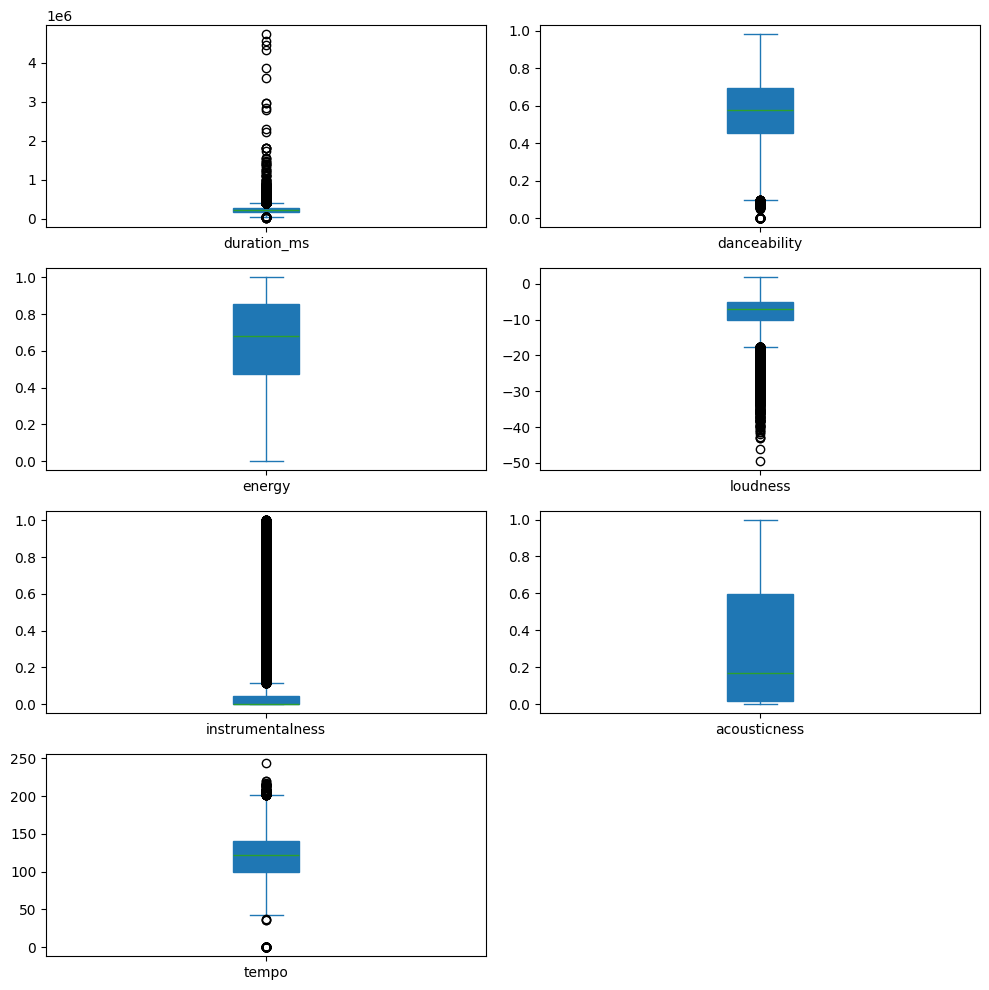

In [415]:
columns_to_plot = ['duration_ms', 'danceability', 'energy', 'loudness', 'instrumentalness', 'acousticness', 'tempo']

df_train[columns_to_plot].plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10), patch_artist=True)

plt.tight_layout()
plt.show()


In [416]:
mean_duration_ms = df_train['duration_ms'].mean()
# Converta a média para inteiro
df_train.loc[df_train['duration_ms'] > 300000, 'duration_ms'] = int(mean_duration_ms)

mean_tempo = df_train['tempo'].mean()
# Converta a média para inteiro
df_train.loc[df_train['tempo'] < 100, 'tempo'] = int(mean_tempo)

Agora, após fazer isso no primeiro data frame, repeti esses passos de limpeza para os nosos dados, sendo eles o de teste e do samble_submission.

In [417]:
df_test.head() 

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,113186.0,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,228332.0,False,0.369,0.598,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,42819.0,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933.0,False,0.171,0.997,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,59311.0,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578.0,False,0.173,0.803,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91368.0,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387.0,False,0.683,0.511,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61000.0,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293.0,False,0.555,0.941,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [418]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34200 entries, 0 to 7668
Columns: 136 entries, track_unique_id to track_genre_world-music
dtypes: float64(130), object(6)
memory usage: 35.7+ MB


Vi que todos os tipos estão certos e condizentes, mas há o mesmo problema dos dados de teste, há a presença de 3 valores nulos, nas mesmas colunas que tivemos anteriormente, sendo assim vou fazer o mesmo tratamento.

In [419]:
linhas_com_nulos = df_test[df_test.isnull().any(axis=1)]
print(linhas_com_nulos)

       track_unique_id                track_id         artists  \
34199          97832.0  3RLoIn3LB72B3dNiKWjc9G  Jorge & Mateus   
7668               NaN                     NaN             NaN   

                       album_name               track_name  duration_ms  \
34199  10 Anos (Ao Vivo) - Deluxe  Onde Haja Sol - Ao Vivo     228207.0   
7668                          NaN                      NaN          NaN   

      explicit  danceability  energy  key  ...  track_genre_spanish  \
34199    False         0.366   0.725  7.0  ...                  NaN   
7668       NaN           NaN     NaN  NaN  ...                  0.0   

       track_genre_study  track_genre_swedish  track_genre_synth-pop  \
34199                NaN                  NaN                    NaN   
7668                 0.0                  0.0                    0.0   

       track_genre_tango  track_genre_techno  track_genre_trance  \
34199                NaN                 NaN                 NaN   
7668    

In [420]:
df_test.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
count,34199.000000,34199.000000,34199.000000,34199.000000,34199.000000,34199.000000,34199.000000,34199.000000,34199.000000,34199.000000,...,34199.000000,34199.000000,34199.000000,34199.000000,34199.000000,34199.000000,34199.000000,34199.000000,34199.000000,34199.000000
mean,56670.244013,204325.109097,0.565593,0.641043,5.313986,-8.247771,0.637153,0.084424,0.314739,0.153091,...,0.009123,0.008246,0.008012,0.008509,0.008948,0.008831,0.008158,0.008421,0.008509,0.007924
std,32710.624674,48987.923615,0.174546,0.251740,3.554939,5.015042,0.480828,0.105911,0.332550,0.306637,...,0.095079,0.090433,0.089151,0.091852,0.094169,0.093557,0.089955,0.091382,0.091852,0.088666
min,3.000000,8586.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28612.000000,173329.000000,0.455000,0.472000,2.000000,-10.039000,0.000000,0.035800,0.016600,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56475.000000,213179.000000,0.579000,0.683000,5.000000,-6.984000,1.000000,0.048700,0.168000,0.000043,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84856.500000,231400.000000,0.693000,0.853000,8.000000,-5.011000,1.000000,0.084700,0.597000,0.045800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,113999.000000,300000.000000,0.980000,1.000000,11.000000,1.795000,1.000000,0.963000,0.996000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Percebi os mesmos problemas quando vejo a linha que indica o min, como estou notando uma similaridade entre padrões dos dados do qual limpei anteriomente e este, vou ir visualizando mas imagino que usarei em tudo as mesmas logicas. 

In [421]:
linhas_filtradas = df_test[ (df_test['duration_ms'] == 0)]
print(linhas_filtradas)
df_test = df_test.drop(linhas_filtradas.index)

Empty DataFrame
Columns: [track_unique_id, track_id, artists, album_name, track_name, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre, explicit_False, explicit_True, track_genre_acoustic, track_genre_afrobeat, track_genre_alt-rock, track_genre_alternative, track_genre_ambient, track_genre_anime, track_genre_black-metal, track_genre_bluegrass, track_genre_blues, track_genre_brazil, track_genre_breakbeat, track_genre_british, track_genre_cantopop, track_genre_chicago-house, track_genre_children, track_genre_chill, track_genre_classical, track_genre_club, track_genre_comedy, track_genre_country, track_genre_dance, track_genre_dancehall, track_genre_death-metal, track_genre_deep-house, track_genre_detroit-techno, track_genre_disco, track_genre_disney, track_genre_drum-and-bass, track_genre_dub, track_genre_dubstep, track_genre_edm, track_genre_electro, track_genre_electronic

In [422]:
linhas_filtradas = df_test[(df_test['time_signature'] < 3) ]
print(linhas_filtradas)
print(f"Quantidade de linhas filtradas: {len(linhas_filtradas)}")

Empty DataFrame
Columns: [track_unique_id, track_id, artists, album_name, track_name, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre, explicit_False, explicit_True, track_genre_acoustic, track_genre_afrobeat, track_genre_alt-rock, track_genre_alternative, track_genre_ambient, track_genre_anime, track_genre_black-metal, track_genre_bluegrass, track_genre_blues, track_genre_brazil, track_genre_breakbeat, track_genre_british, track_genre_cantopop, track_genre_chicago-house, track_genre_children, track_genre_chill, track_genre_classical, track_genre_club, track_genre_comedy, track_genre_country, track_genre_dance, track_genre_dancehall, track_genre_death-metal, track_genre_deep-house, track_genre_detroit-techno, track_genre_disco, track_genre_disney, track_genre_drum-and-bass, track_genre_dub, track_genre_dubstep, track_genre_edm, track_genre_electro, track_genre_electronic

In [423]:
df_test.loc[df_test['time_signature'] < 3, 'time_signature'] = 4

In [424]:
soma_duplicados = df_test[['track_id', 'artists', 'album_name', 'track_name']].duplicated(keep='first').sum()
df_test_sem_duplicatas = df_test.drop_duplicates(subset=['track_id', 'artists', 'album_name', 'track_name'], keep='first')
print(f"Número total de duplicatas: {soma_duplicados}")


Número total de duplicatas: 2869


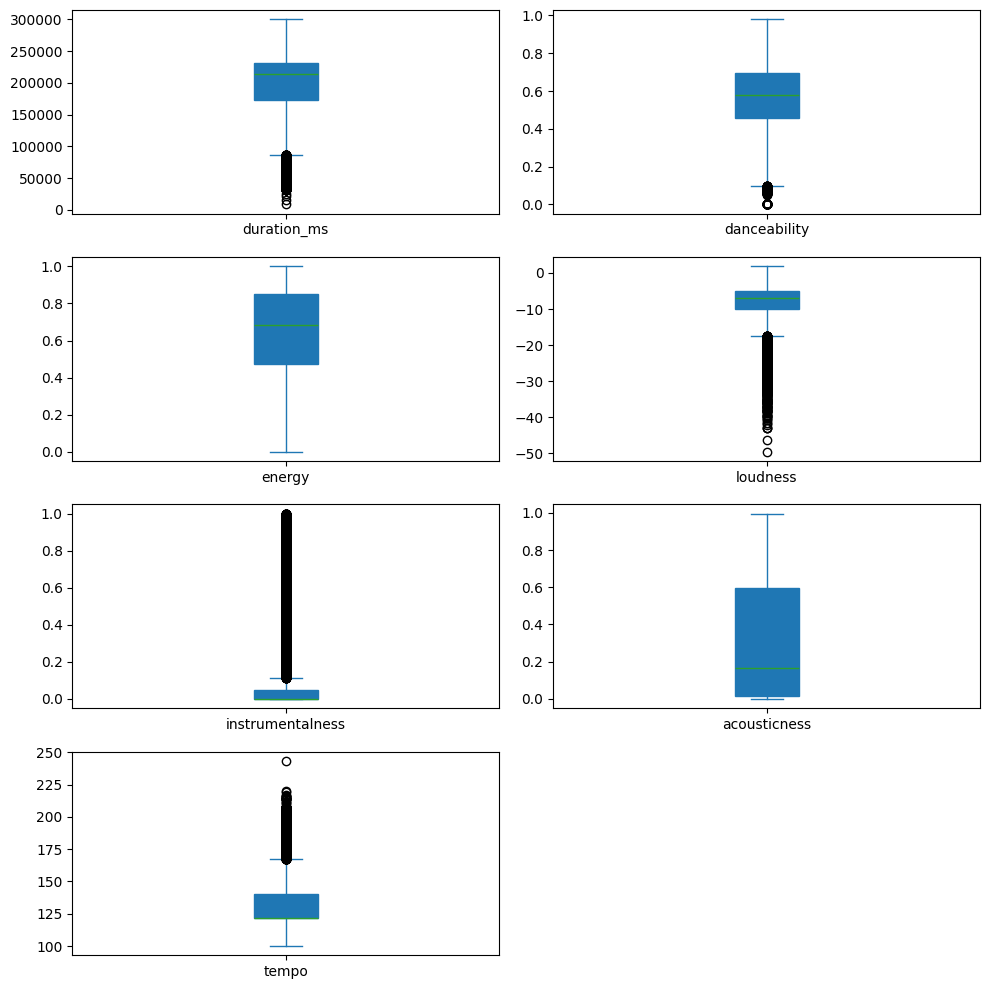

In [425]:
columns_plot = ['duration_ms', 'danceability', 'energy', 'loudness', 'instrumentalness', 'acousticness', 'tempo']

df_test[columns_plot].plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10), patch_artist=True)

plt.tight_layout()
plt.show()


In [426]:
mean_duration_ms = df_test['duration_ms'].mean()
# Converta a média para inteiro
df_test.loc[df_test['duration_ms'] > 300000, 'duration_ms'] = int(mean_duration_ms)

mean_tempo = df_test['tempo'].mean()
# Converta a média para inteiro
df_test.loc[df_test['tempo'] < 100, 'tempo'] = int(mean_tempo)


INTRODUZIR NAO ESQUECE

In [427]:
duplicados = df_submission[df_submission['track_unique_id'].duplicated()]

# Exibir os valores duplicados
print(duplicados)

Empty DataFrame
Columns: [track_unique_id, popularity_target]
Index: []


A partir de todos estes processos, consegui verificar de que não havia nenhum problema ou necessidade de limpeza nesses dados.

#### Codificação de Variáveis ​​Categóricas

A codificação para variáveis categóricas é uma etapa fundamental no pré-processamento de dados, ainda mais quando o assunto é a construção de modelos preditivos. 

Variáveis categóricas são aquelas que contêm valores em categorias ou rótulos discretos, como "Baixo", "Médio", "Alto". Esses valores são qualitativos e, para que os modelos possam usá-los, eles precisam ser convertidos em representações numéricas.

Mas para codificar, antes é preciso decidir quais colunas que possuem variáveis categóricas e que podemos tranformar em representações numéricas. Então decidi tranformar os dados das colunas: explicit e track_genre que são duas colunas da qual possuem dados que podem ser tranformados em representações númericas por possuirem um determinado número finito de possibilidades. Por exemplo, na coluna Explicit só pode ser sim ou não e na track_genre só podemos ter os gêneros que aparecem, vale ressaltar que há uma alta ocorrência de repetição destes também.

Como ambas variaveis são nominais ou seja que não possuem ordem, optei por utilizar o método One-Hot Encoding.

In [428]:


# Criando instâncias do OneHotEncoder
ohe_explicit = OneHotEncoder(sparse_output=False)  # Mudança aqui
ohe_genre = OneHotEncoder(sparse_output=False)   
# Codificando a coluna 'explicit'
explicit_encoded = ohe_explicit.fit_transform(df_train[['explicit']])
# Codificando a coluna 'track_genre'
genre_encoded = ohe_genre.fit_transform(df_train[['track_genre']])

# Criando DataFrames com os dados codificados
explicit_df = pd.DataFrame(explicit_encoded, columns=ohe_explicit.get_feature_names_out(['explicit']))
genre_df = pd.DataFrame(genre_encoded, columns=ohe_genre.get_feature_names_out(['track_genre']))

# Concatenando os DataFrames codificados ao DataFrame original
df_train = pd.concat([df_train, explicit_df, genre_df], axis=1)

# Exibindo as primeiras linhas com as colunas codificadas
print(df_train.head())


   track_unique_id                track_id                     artists  \
0         113186.0  6KwkVtXm8OUp2XffN5k7lY            Hillsong Worship   
1          42819.0  2dp5I5MJ8bQQHDoFaNRFtX                Internal Rot   
2          59311.0  5avw06usmFkFrPjX8NxC40  Zhoobin Askarieh;Ali Sasha   
3          91368.0  75hT0hvlESnDJstem0JgyR                 Bryan Adams   
4          61000.0  4bY2oZGA5Br3pTE1Jd1IfY                  Nogizaka46   

                        album_name             track_name  duration_ms  \
0                    No Other Name          No Other Name     228332.0   
1                   Grieving Birth         Failed Organum      93933.0   
2             Noise A Noise 20.4-1  Save the Trees, Pt. 1     213578.0   
3  All I Want For Christmas Is You        Merry Christmas     151387.0   
4                       バレッタ TypeD                  月の大きさ     236293.0   

  explicit  danceability  energy  key  ...  track_genre_spanish  \
0    False         0.369   0.598  7.0  ... 

Agora irei fazer as explorações dos dados para ver se conseigo algun isight e tendencia, para isso vou usar os generos musicais e visualizar quais são os que mais aparecem.

In [430]:

genre_columns = [col for col in df_train.columns if 'track_genre_' in col]

genre_counts = df_train[genre_columns].sum()


genre_df = pd.DataFrame(genre_counts).reset_index()
genre_df.columns = ['Gênero', 'Incidência']

print(genre_df)


                      Gênero  Incidência
0       track_genre_acoustic       311.0
1       track_genre_afrobeat       297.0
2       track_genre_alt-rock       313.0
3    track_genre_alternative       293.0
4        track_genre_ambient       275.0
..                       ...         ...
109       track_genre_techno       302.0
110       track_genre_trance       279.0
111     track_genre_trip-hop       288.0
112      track_genre_turkish       291.0
113  track_genre_world-music       271.0

[114 rows x 2 columns]


Explorando esses dados vi que não há uma incidência muito grande de um gênero predominante, aparentemente a diferença é bem pouca, ou seja, a uma diversidade grande de gêneros músicais. Mas ainda nessa linha de raíocinio, pensei em relacionar os resultados da coluna popularidade_target dos dados do arquivo sample_submission, para assim conseguir visualizar se há algum genêro que possui probabilidade maior e encontrei esse dado.

KeyError: 'track_genre_nan'

In [398]:
df_train.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,popularity_target,Probabilidade_Popularidade
0,113186.0,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,228332.0,False,0.369,0.598,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.642066
1,42819.0,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933.0,False,0.171,0.997,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.410180
2,59311.0,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578.0,False,0.173,0.803,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625442
3,91368.0,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387.0,False,0.683,0.511,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.464286
4,61000.0,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293.0,False,0.555,0.941,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.503333


Agora irei gerar os gráficos com as 10 maiores probabilidaes:

C:\Users\Inteli\AppData\Local\Temp\ipykernel_17452\482757575.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_genres, x='Probabilidade_Popularidade', y='Gênero', palette='viridis')


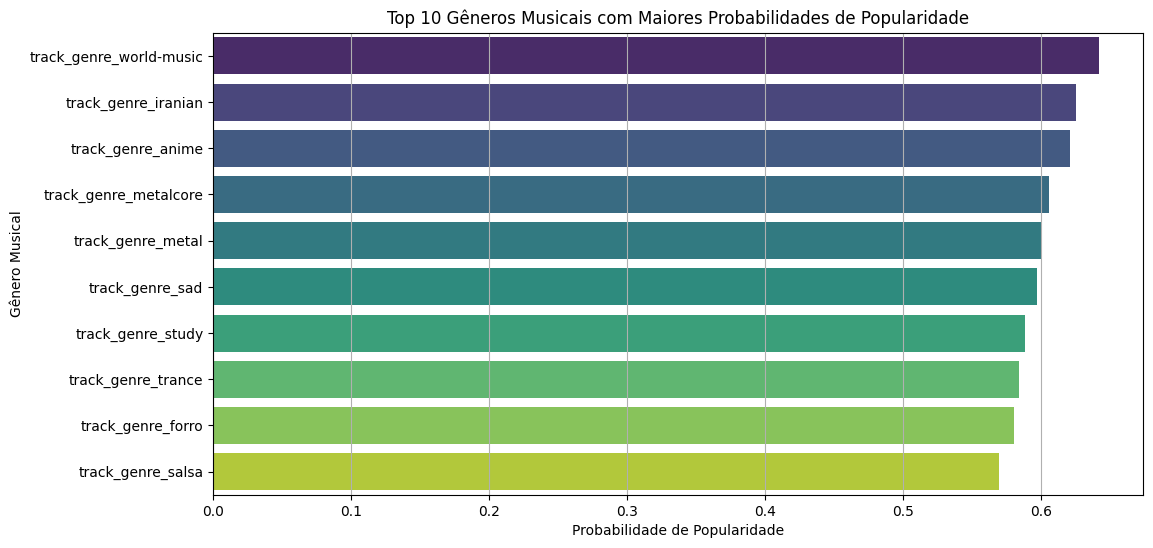

In [399]:
genre_columns = ohe_genre.get_feature_names_out()

genre_probabilities = pd.DataFrame({
    'Gênero': genre_columns,
    'Probabilidade_Popularidade': [genre_df.loc[genre_df['Gênero'] == genre, 'Probabilidade_Popularidade'].values[0] for genre in genre_columns]
})


top_10_genres = genre_probabilities.nlargest(10, 'Probabilidade_Popularidade')


plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_genres, x='Probabilidade_Popularidade', y='Gênero', palette='viridis')
plt.title('Top 10 Gêneros Musicais com Maiores Probabilidades de Popularidade')
plt.xlabel('Probabilidade de Popularidade')
plt.ylabel('Gênero Musical')
plt.grid(axis='x')
plt.show()

Nesse foi possível visualizar que o genero musical world music é o que tem maior probabilidade de obter sucesso, sendo assim, caso uma música obtenha esse gênero, ela tem uma maior chance de obter popularidade. Sendo essa minha primeira hipótese, ou seja, de que o gênero pode impactar na popularidade.

C:\Users\Inteli\AppData\Local\Temp\ipykernel_17452\142290942.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_artists, x='Número_de_Músicas_Populares', y='artists', palette='viridis')


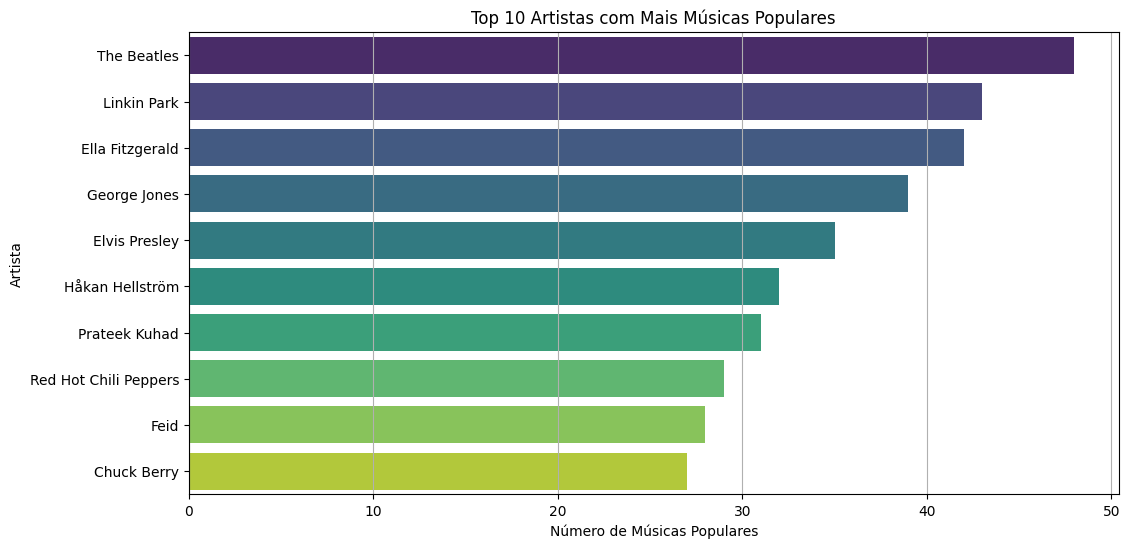

In [400]:
# Passo 1: Contar o número de músicas populares por artista
artist_popularity_counts = df_train[df_train['popularity_target'] == 1].groupby('artists').size().reset_index(name='Número_de_Músicas_Populares')

# Passo 2: Selecionar os 10 artistas com mais músicas populares
top_10_artists = artist_popularity_counts.nlargest(10, 'Número_de_Músicas_Populares')

# Passo 3: Criar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_artists, x='Número_de_Músicas_Populares', y='artists', palette='viridis')
plt.title('Top 10 Artistas com Mais Músicas Populares')
plt.xlabel('Número de Músicas Populares')
plt.ylabel('Artista')
plt.grid(axis='x')
plt.show()

Nesse gráfico podemos ver algo expressivo de como alguns artistas possuem uma chance de criar uma música popular maior, isso pode ser evidenciado pelo sucesso do artista. Criando assim também outra hipótese de que os artistas mais famosos e mais populares mundialmente, possuem uma chance maior de suas músicas serem populares.